In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df_amazon = pd.read_csv('amz_uk_price_prediction_dataset (1).csv')
df_amazon

ParserError: Error tokenizing data. C error: EOF inside string starting at row 117089

In [ ]:
category_frequency = df_amazon['category'].value_counts()

top_5_categories = category_frequency.head(5)
print(top_5_categories)

category
Sports & Outdoors                   13123
Boys                                11789
Car & Motorbike                      9383
Fireplaces, Stoves & Accessories     9364
CD, Disc & Tape Players              8798
Name: count, dtype: int64


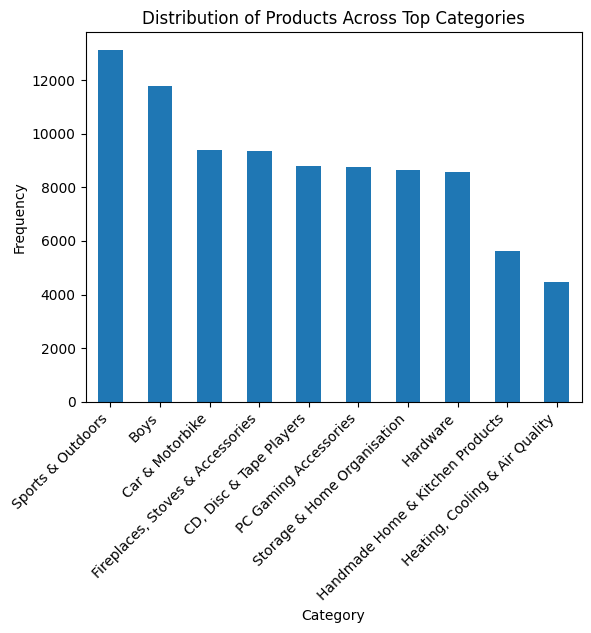

In [ ]:
top_categories = category_frequency.head(10) # Adjust this number as needed

top_categories.plot(kind='bar')
plt.title('Distribution of Products Across Top Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

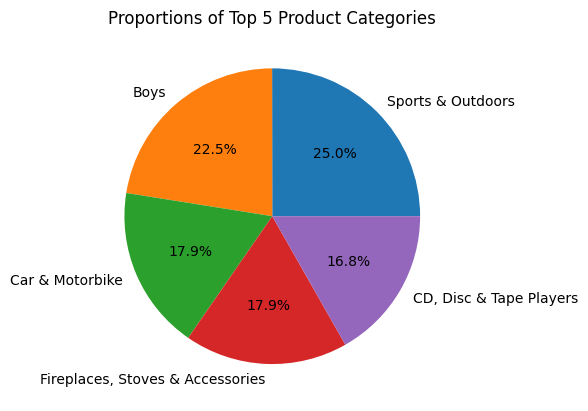

In [ ]:
top_5_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportions of Top 5 Product Categories')
plt.ylabel('')
plt.show()

**Ответ**

1. Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             1

2. Sports & Outdoors имеет огромное расхождение с остальными категориями.


In [ ]:
mean_price = df_amazon['price'].mean()
median_price = df_amazon['price'].median()
mode_price = df_amazon['price'].mode()[0]

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")

Mean Price: 63.98265882279052
Median Price: 19.29
Mode Price: 9.99


In [ ]:
variance_price = df_amazon['price'].var()
std_deviation_price = df_amazon['price'].std()
range_price = df_amazon['price'].max() - df_amazon['price'].min()
q1 = df_amazon['price'].quantile(0.25)
q3 = df_amazon['price'].quantile(0.75)
iqr = q3 - q1

print(f"Variance: {variance_price}")
print(f"Standard Deviation: {std_deviation_price}")
print(f"Range: {range_price}")
print(f"Interquartile Range: {iqr}")

Variance: 54559.147059385105
Standard Deviation: 233.5789953300277
Range: 13160.72
Interquartile Range: 35.879999999999995


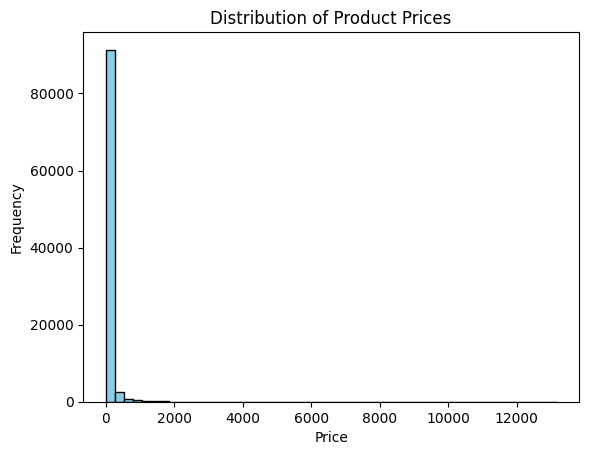

In [ ]:
plt.hist(df_amazon['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

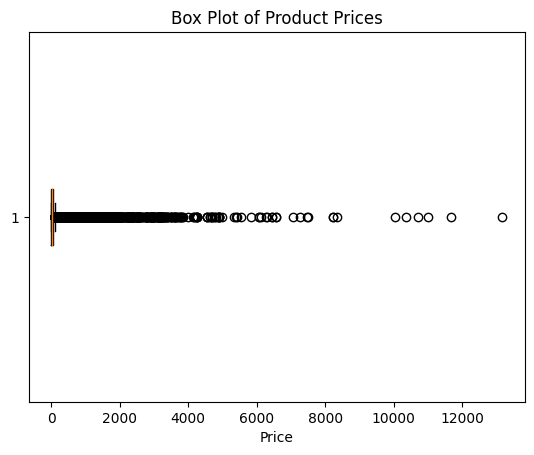

In [ ]:
plt.boxplot(df_amazon['price'], vert=False)
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

**Ответ**

1. Средняя цена равна 19, что при сравнении со значением моды 10 показывает, что наиболее распространенная цена ниже средней.

2. Существует крайнее расхождение между самой высокой и минимальной ценой, которые уже указывают на значения спреда. Дисперсия также подчеркивает его очень высоким значением, показывающим огромный разрыв с ценами, и средним значением, показывающим широкое распределение цен.

3. Да, по-видимому, есть значение, достигающее цены в районе 100000, и другое около 78000, что приводит к широкому распространению.


In [ ]:
mean_rating = df_amazon['stars'].mean()
median_rating = df_amazon['stars'].median()
mode_rating = df_amazon['stars'].mode()[0]

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")

Mean Rating: 2.851132093247218
Median Rating: 4.1
Mode Rating: 0.0


In [ ]:
variance_rating = df_amazon['stars'].var()
std_deviation_rating = df_amazon['stars'].std()
q1_rating = df_amazon['stars'].quantile(0.25)
q3_rating = df_amazon['stars'].quantile(0.75)
iqr_rating = q3_rating - q1_rating

print(f"Variance: {variance_rating}")
print(f"Standard Deviation: {std_deviation_rating}")
print(f"Interquartile Range: {iqr_rating}")

Variance: 4.370793102314616
Standard Deviation: 2.0906441835746743
Interquartile Range: 4.5


In [ ]:
skewness_rating = df_amazon['stars'].skew()
kurtosis_rating = df_amazon['stars'].kurtosis()

print(f"Skewness: {skewness_rating}")
print(f"Kurtosis: {kurtosis_rating}")

Skewness: -0.5726823524886663
Kurtosis: -1.5748723319383575


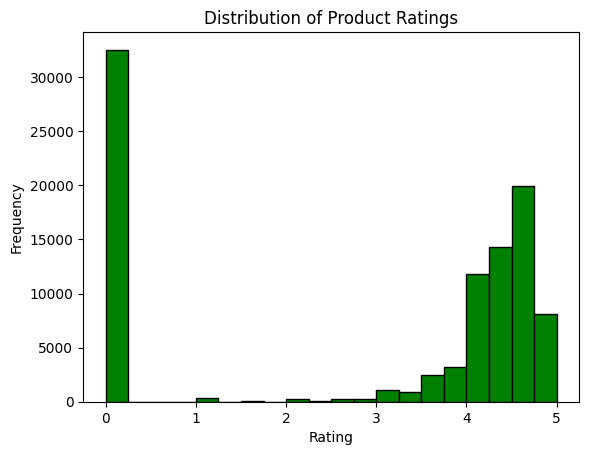

In [ ]:
plt.hist(df_amazon['stars'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Ответы**

1. Значение медианы, равное 0, указывает на то, что большинство добавляет оценку как 0 или не добавляет оценку вообще.

2. Да, глядя на значение Varience, становится ясно, что существует большой разброс в рейтингах. Это свидетельствует о том, что у покупателей высокая разница во мнении о товарах.

3. Асимметрия очень близка к 0, что указывает на симметричное распределение. Отрицательное значение эксцесса указывает на то, что распределение более плоское, чем обычное, с меньшим количеством контуров.

4. Наиболее распространенным рейтингом является 0, за которым следует что-то близкое к 5.

In [ ]:
crosstab = pd.crosstab(df_amazon['category'], df_amazon['isBestSeller'])

bestSellerProportion = crosstab[True] / (crosstab[True] + crosstab[False])

crosstab['bestSellerProportion'] = bestSellerProportion
sorted_crosstab = crosstab.sort_values(by='bestSellerProportion', ascending=False)
print(sorted_crosstab)

isBestSeller                      False  True  bestSellerProportion
category                                                           
Light Bulbs                          18     5              0.217391
Motorbike Clothing                  237     8              0.032653
Microphones                         237     7              0.028689
Smart Speakers                       45     1              0.021739
Wearable Technology                1575    29              0.018080
Hardware                           8424   146              0.017036
Motorbike Accessories               239     3              0.012397
Car & Motorbike                    9296    87              0.009272
Motorbike Boots & Luggage           248     2              0.008000
Bathroom Lighting                   252     2              0.007874
Handmade Home & Kitchen Products   5595    44              0.007803
Coffee & Espresso Machines          510     4              0.007782
Boys                              11702    87   

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [ ]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-square test statistic: {chi2}")
print(f"p-value: {p}")

Chi-square test statistic: 1215.034838150362
p-value: 6.090120030430349e-223


In [ ]:

def cramers_v(chi2, n, k_min):
    return np.sqrt(chi2 / (n * (k_min - 1)))

n = df_amazon.shape[0]
k_min = min(crosstab.shape)

cramers_v_value = cramers_v(chi2, n, k_min)
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.07974568730391061


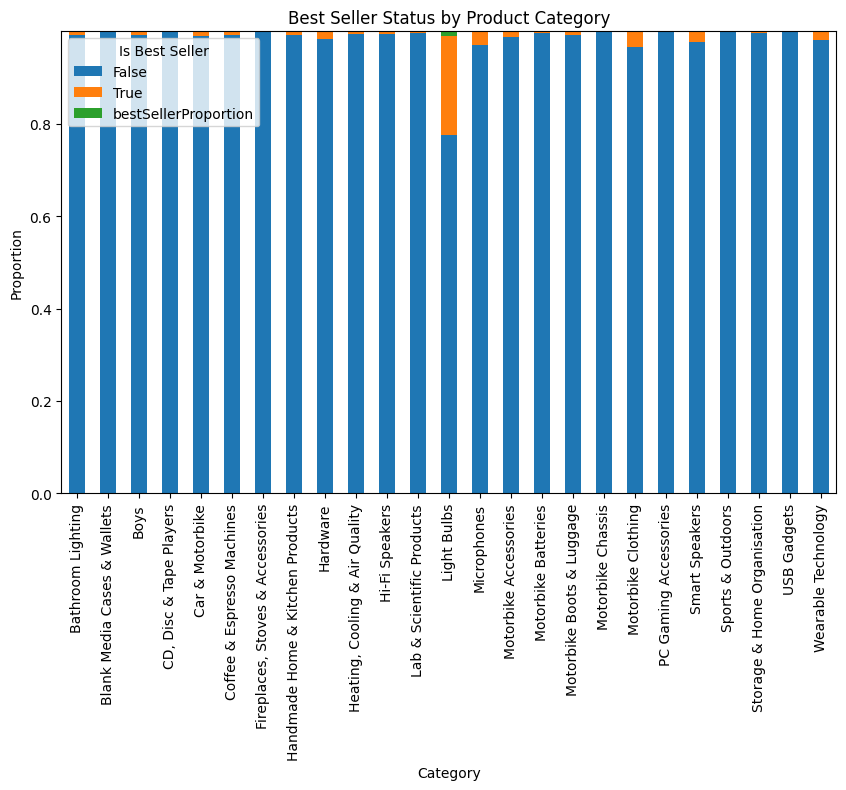

In [ ]:
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Best Seller Status by Product Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.legend(title='Is Best Seller')
plt.show()

In [ ]:
sorted_crosstab = crosstab.sort_values(by='bestSellerProportion', ascending=False)
top_10_best_seller_proportion = sorted_crosstab.head(10)

print(top_10_best_seller_proportion)

isBestSeller               False  True  bestSellerProportion
category                                                    
Light Bulbs                   18     5              0.217391
Motorbike Clothing           237     8              0.032653
Microphones                  237     7              0.028689
Smart Speakers                45     1              0.021739
Wearable Technology         1575    29              0.018080
Hardware                    8424   146              0.017036
Motorbike Accessories        239     3              0.012397
Car & Motorbike             9296    87              0.009272
Motorbike Boots & Luggage    248     2              0.008000
Bathroom Lighting            252     2              0.007874


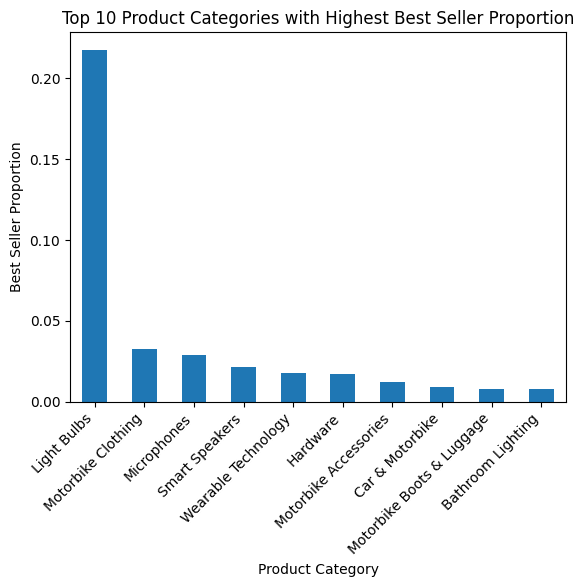

In [ ]:
top_10_best_seller_proportion['bestSellerProportion'].plot(kind='bar')
plt.title('Top 10 Product Categories with Highest Best Seller Proportion')
plt.xlabel('Product Category')
plt.ylabel('Best Seller Proportion')
plt.xticks(rotation=45, ha='right')  # Rotate category names for better readability
plt.show()

In [ ]:
Q1 = df_amazon['price'].quantile(0.25)
Q3 = df_amazon['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_amazon[(df_amazon['price'] >= lower_bound) & (df_amazon['price'] <= upper_bound)]

In [ ]:
top_20_categories = df_filtered['category'].value_counts().head(20).index

df_top_20 = df_filtered[df_filtered['category'].isin(top_20_categories)]

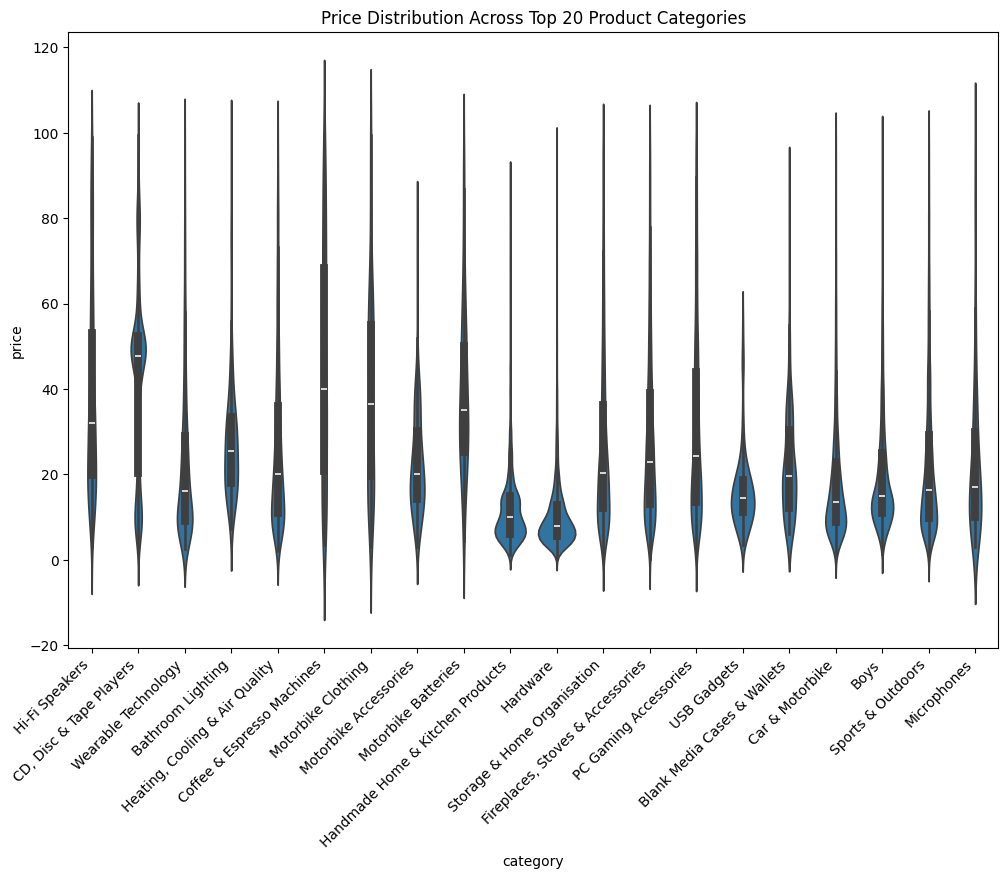

In [ ]:

plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_20)
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution Across Top 20 Product Categories')
plt.show()

Home & Kitchen Products - самая высокая медианная цена


In [ ]:
category_mean_prices = df_filtered.groupby('category')['price'].mean().reset_index()

top_10_categories_by_mean_price = category_mean_prices.sort_values(by='price', ascending=False).head(10)

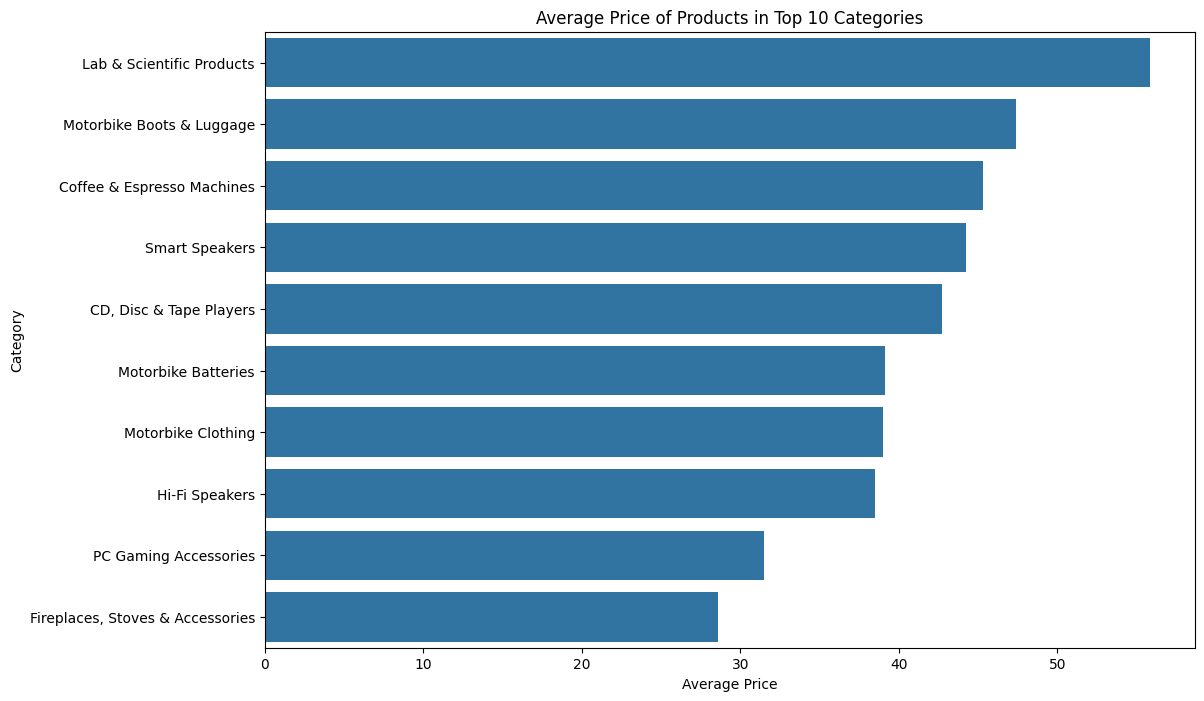

In [ ]:
category_mean_prices = df_filtered.groupby('category')['price'].mean().reset_index()

top_10_categories_by_mean_price = category_mean_prices.sort_values(by='price', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='category', data=top_10_categories_by_mean_price)
plt.title('Average Price of Products in Top 10 Categories')
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.show()

In [ ]:
top_10_categories_by_count = df_filtered['category'].value_counts().head(10).index
df_top_10_ratings = df_filtered[df_filtered['category'].isin(top_10_categories_by_count)]

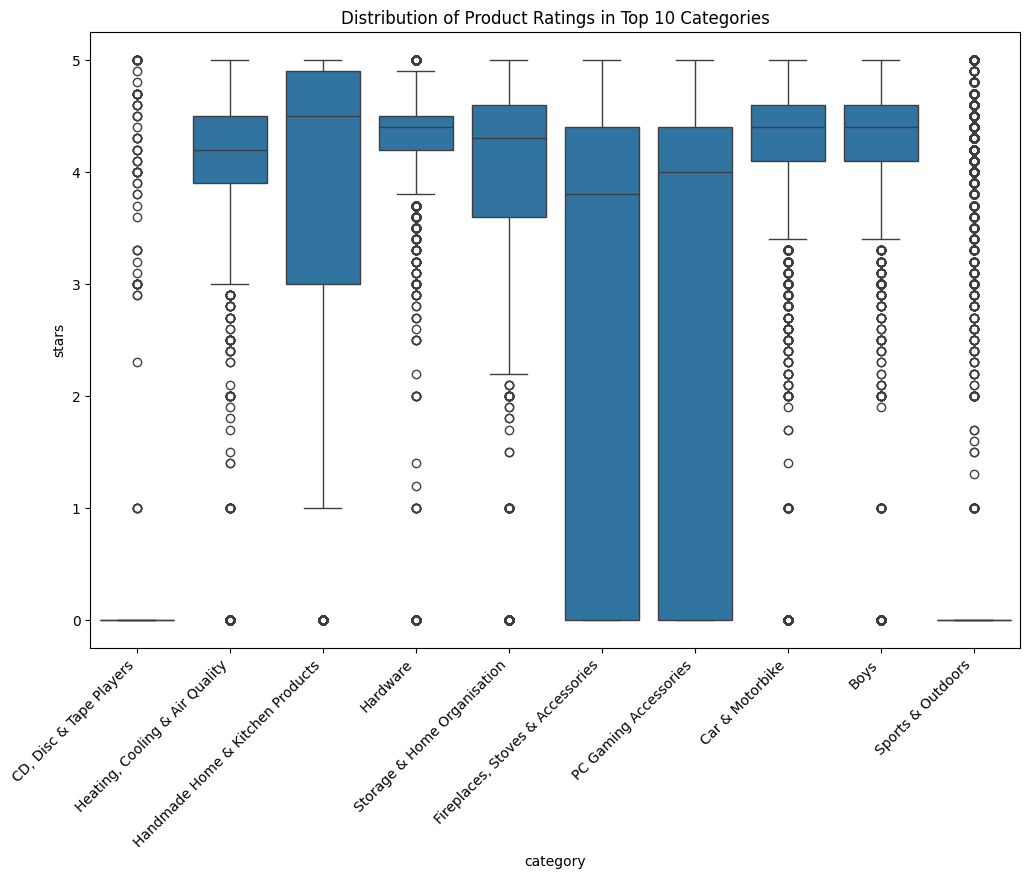

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_10_ratings)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Product Ratings in Top 10 Categories')
plt.show()

Motherboards - категория  с самой высокая средняя цена

In [ ]:

correlation_coefficient = df_filtered['price'].corr(df_filtered['stars'])
print(f"Correlation Coefficient between Price and Rating: {correlation_coefficient}")

Correlation Coefficient between Price and Rating: -0.13229795489706875


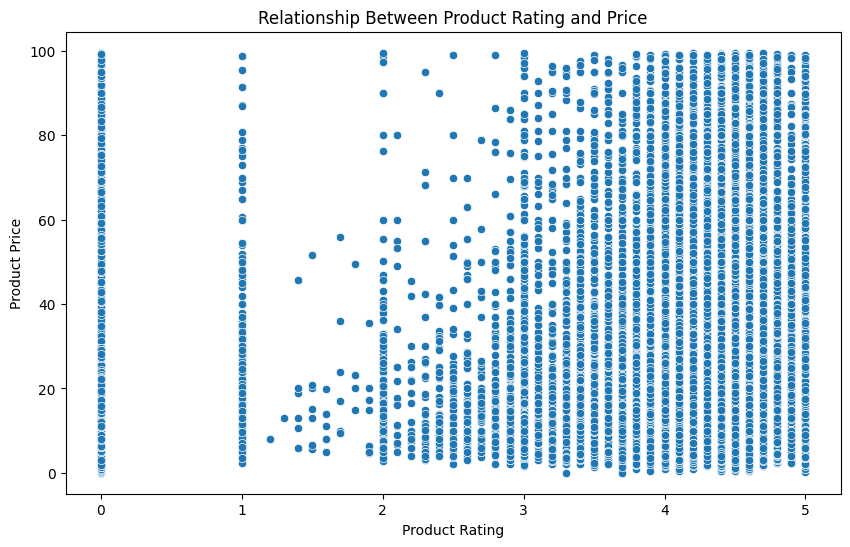

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='stars', y='price')
plt.title('Relationship Between Product Rating and Price')
plt.xlabel('Product Rating')
plt.ylabel('Product Price')
plt.show()

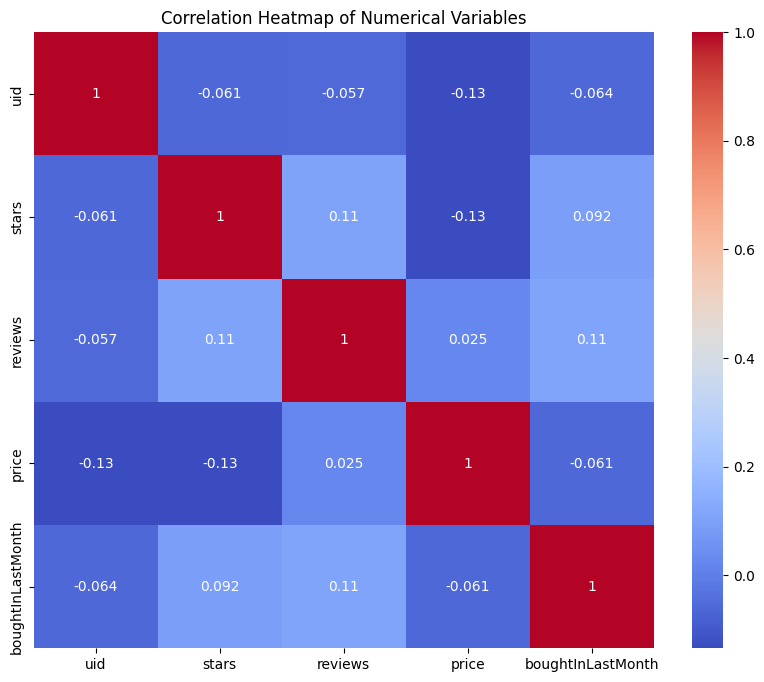

In [ ]:

numeric_df = df_filtered.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Слабая связь между отзывами и стартами подчеркивает, что даже те, которые содержат старты, не обязательно содержат обзоры. Слабая связь между ценой и рейтингами говорит о том, что цена не влияет на  рейтингеи. Существует положительная тенденция между рейтингами  и отзывами, которые показывают, что продукты, которые продаются больше, как правило, имеют больше отзывов и звезд.

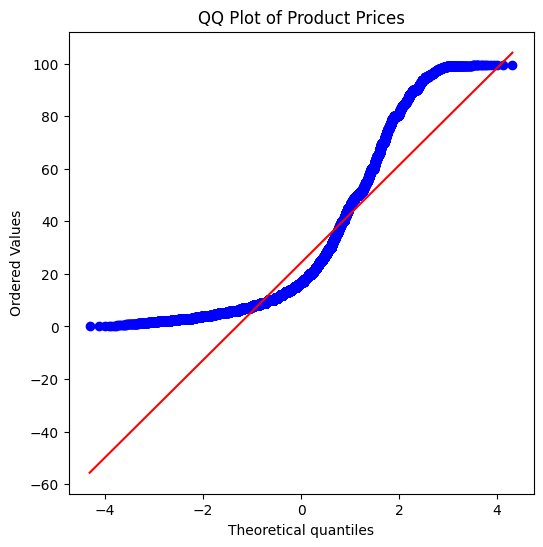

In [ ]:
plt.figure(figsize=(6, 6))
stats.probplot(df_filtered['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.show()

Ответ

Когда синяя линия находится довольно далеко от красной линии в обоих хвостах, это указывает на то, что цены на продукты имеют более глубокие хвосты, чем при обычном распределении. Таким образом, распределение цен на продукты не является нормальным с перекосом в обоих концах. Это также подчеркивает, что лишь немногие продукты имеют высокую цену.